In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def without_inf(x):
    invalid = np.isinf(x['speed']) | np.isinf(x['course'])
    return x[~invalid]

def mask_for(x, mmsi):
    mask = np.zeros(x.shape, dtype=bool)
    for m in mmsi:
        mask |= (m == x['mmsi'])
    return mask

In [3]:
def evaluate(x, name):
    print(name)
    # Use course to find out of range MMSI since course should 
    # never be above 360 (speed has a softer cutoff).
    # There turn out to be a few due to noise or soemthing, so
    # we use the fraction of course values above 360. There should
    # only be a few or (none) if the data has been scaled, most of 
    # the values should be greater than 360 if it has not been since
    # the range is 0-3600
    mmsi = sorted(set(x['mmsi']))
    out_of_range = set()
    for m in mmsi:
        x_w_m = x[x['mmsi'] == m]
        metric = (x_w_m['course'] > 360).sum() / len(x_w_m)
        if metric > 0.5:
            out_of_range.add(m)
    print("MMSI with course out of range", sorted(out_of_range))
    # Plot histograms for course
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
    mask = mask_for(x, out_of_range)
    ax1.hist(x['course'][~mask])
    ax1.set_xlabel("course")
    if out_of_range:
        ax2.hist(x['course'][mask])
        ax2.set_xlabel("course")
    # Plot histograms for speed
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
    ax1.hist(x['speed'][~mask])
    ax1.set_xlabel("speed")
    if out_of_range:
        ax2.hist(x['speed'][mask])
        ax2.set_xlabel("speed")


longliner
MMSI with course out of range [224068000.0, 224098250.0, 224108130.0]
trawl
MMSI with course out of range []
ps
MMSI with course out of range []


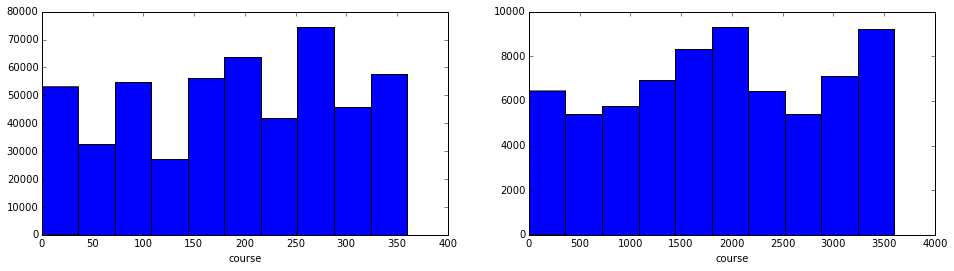

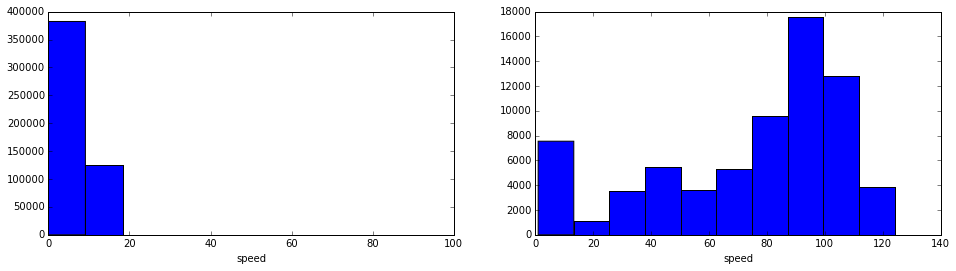

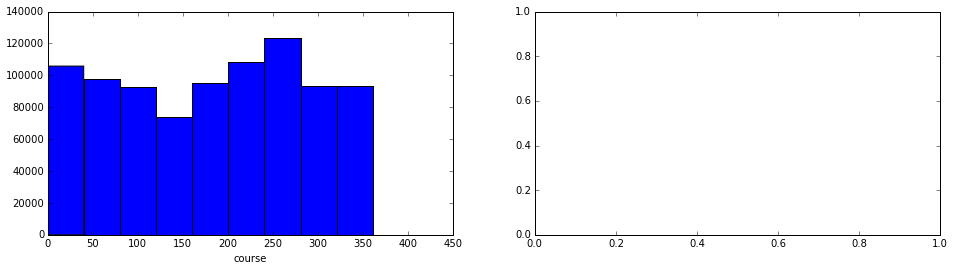

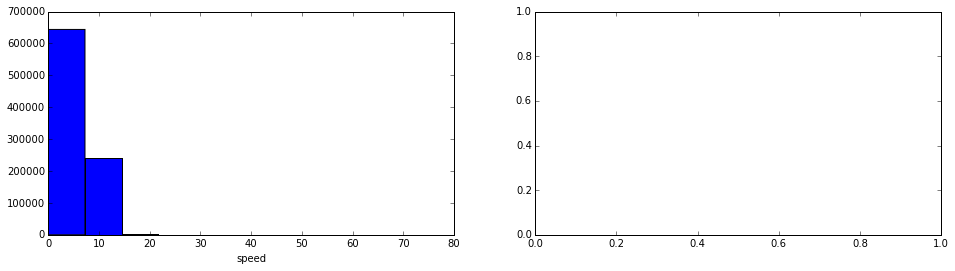

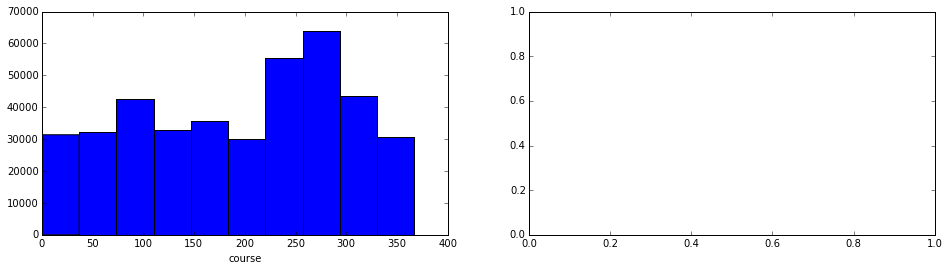

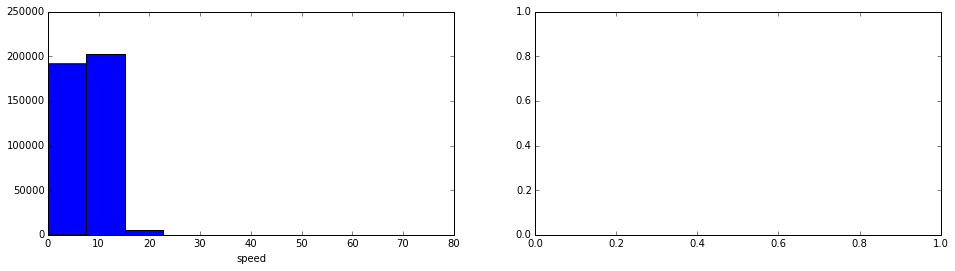

In [4]:
for name in ["longliner", "trawl", "ps"]: 
    x_x = without_inf(np.load('datasets/kristina_{0}.npz'.format(name))['x'])
    evaluate(x_x, name)